# <center><div class="alert alert-block alert-danger"><b>Actividad Inteligencia Artificial</b><br></div></center></center>
## Tema: 
### Modulo de caracteristicas del micronegocio
## Autores:
### Brayan Andrés Medina Correa - Pablo Cesar Garcia Camero

<div class="alert alert-block alert-success">
<b>Introduccion:</b><br>
El trabajo se desarrollara con las diferentes caracteristicas de los micronegocios del sector agropecuario, o personas relacionadas con los trabajos a fin. Buscamos encontrar variables que destaquen para poder generar conocimiento con base a las tendencias y herramientas aprendidas en clase de Inteligencia Artificial
</div>

<div class="alert alert-block alert-success"><b>PASO 1: Importe de librerias</b><br></div>


In [1]:
##importamos las librerias necesarias para el desarrollo de nuestra actividad
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#importamos la opcion de warnings para evitar alertas molestas
import warnings
warnings.simplefilter(action='ignore')

<div class="alert alert-block alert-success"><b>PASO 2: Importe de dataset y Tratamiento de los datos</b><br></div>

In [2]:
##importamos dataset y moestramos los datos de cabecera
##micro=micronegocio data
micro=pd.read_csv("Modulo de caracteristicas del micronegocio.csv", index_col=False)
micro.head()

,DIRECTORIO;SECUENCIA_ENCUESTA;SECUENCIA_P;P1633;P986;P640;P4000;P1055;P1056;P661;P1057;P4004;P2991;P2992;P2993;CLASE;COD_DEPTO;AREA;F_EXP
0,4780120;1;1;2; ;3; ;2; ; ;2; ; ; ; ;1;76; ;295
1,4780124;1;1;2; ;5;1;2; ; ;2; ; ; ; ;1;76; ;363
2,4780125;1;1;1;2;5;1;2; ; ;2; ; ; ; ;1;76; ;423
3,4780138;1;1;2; ;3; ;2; ; ;2; ; ; ; ;1;76; ;337
4,4780145;1;1;2; ;5;1;2; ; ;2; ; ; ; ;2;23; ;201


In [3]:
##encontramos que los datos tienen una separacion diferente asi que descubrimos que se separan
##por punto y coma asi que añadimos una caracteristica al importe
micro=pd.read_csv("Modulo de caracteristicas del micronegocio.csv", index_col=False, sep=';')
micro.head()

,DIRECTORIO,SECUENCIA_ENCUESTA,SECUENCIA_P,P1633,P986,P640,P4000,P1055,P1056,P661,P1057,P4004,P2991,P2992,P2993,CLASE,COD_DEPTO,AREA,F_EXP
0,4780120,1,1,2,,3,,2,,,2,,,,,1,76,,"295,24240408"
1,4780124,1,1,2,,5,1,2,,,2,,,,,1,76,,"363,25222238"
2,4780125,1,1,1,2,5,1,2,,,2,,,,,1,76,,"423,131668"
3,4780138,1,1,2,,3,,2,,,2,,,,,1,76,,"337,29445917"
4,4780145,1,1,2,,5,1,2,,,2,,,,,2,23,,"201,81828011"


In [4]:
##ahora buscamos que sea un dataset lo que obtuvimos y si existen datos NA
def exploratorio(micro):
    if isinstance(micro, pd.DataFrame):
        total_na = micro.isna().sum().sum()
        print("Dimensiones: %d filas, %d columnas" % (micro.shape[0], micro.shape[1]))
        print("Total Valores NA: %d" %(total_na))
        print("%38s %10s  %10s %10s" % ("Nombre Columna","Tipo de Dato","#Distintos","Valores NA"))
        col_name = micro.columns
        dtyp = micro.dtypes
        uniq = micro.nunique()
        na_val = micro.isna().sum()
        for i in range(len(micro.columns)):
            print("%38s %10s  %10s %10s" % (col_name[i],dtyp[i],uniq[i],na_val[i]))  
    else:
        print("Se esperaba dataframe %15s" % (type(micro)))

exploratorio(micro)

Dimensiones: 86969 filas, 19 columnas
Total Valores NA: 0
                        Nombre Columna Tipo de Dato  #Distintos Valores NA
                            DIRECTORIO      int64       73494          0
                    SECUENCIA_ENCUESTA      int64          21          0
                           SECUENCIA_P      int64           5          0
                                 P1633      int64           2          0
                                  P986     object           3          0
                                  P640      int64           5          0
                                 P4000     object           4          0
                                 P1055      int64           2          0
                                 P1056     object           3          0
                                  P661     object           3          0
                                 P1057     object           3          0
                                 P4004     object           5   

<div class="alert alert-block alert-success"><b>PASO 3: Conversion de valores tipo Object</b><br></div>

In [5]:
##necesitamos que todos los valores sean tipo numerico o int, para esto le aplicaremos
##una funcion vista en clase para reemplazarlos
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['P986','P4000','P1056','P661','P1057','P4004'
                                 ,'P2991','P2992','P2993','AREA','F_EXP'])
##conservamos el dataset original y lo asignamos a una nueva variable
microD=pd.DataFrame(encoder.fit_transform(micro))
##la asamos por la funcion comprobando que todos los datos son numericos
exploratorio(microD)

Dimensiones: 86969 filas, 19 columnas
Total Valores NA: 0
                        Nombre Columna Tipo de Dato  #Distintos Valores NA
                            DIRECTORIO      int64       73494          0
                    SECUENCIA_ENCUESTA      int64          21          0
                           SECUENCIA_P      int64           5          0
                                 P1633      int64           2          0
                                  P986      int64           3          0
                                  P640      int64           5          0
                                 P4000      int64           4          0
                                 P1055      int64           2          0
                                 P1056      int64           3          0
                                  P661      int64           3          0
                                 P1057      int64           3          0
                                 P4004      int64           5   

<div class="alert alert-block alert-success"><b>PASO 4: Correlacion de datos buscando tendencias de datos</b><br></div>

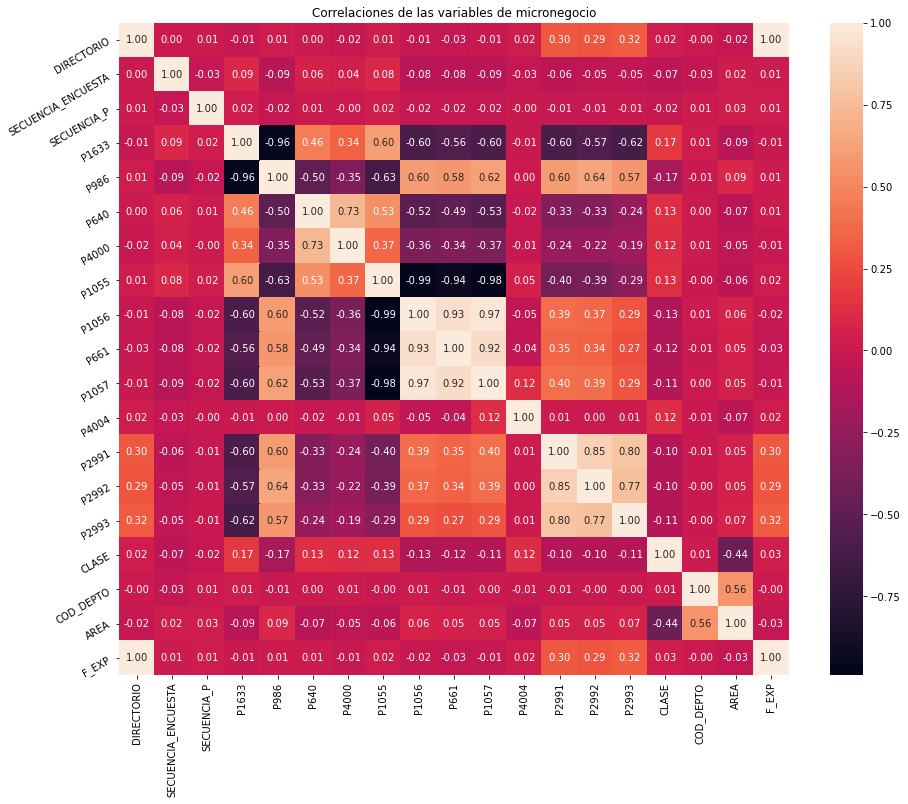

In [6]:
##asignamos del modelo de correlacion a la variable correla
correla = microD.corr()
##dimensiones de la figura
plt.figure(figsize=(15,12))
##le asignamos un titulo
plt.title('Correlaciones de las variables de micronegocio')
##le asignamos mas caracteristicas al grafico como la cantidad de decimales y los colores
a = sns.heatmap(correla, square=False, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
##imprimimos el grafico
plt.show()

In [7]:
##segun la grafica anterior podemos destacar que las variables mas relevantes son:
# P1633 ¿El negocio o actividad tiene Registro Único Tributario (RUT)? 
# P986  ¿A que regimen pertenece? 1 commun 2 simplificado
# P1056 ¿Cómo está registrado? 1 Como persona natural comerciante 2 Como persona jurídica 
# P661  ¿Obtuvo o renovó ese registro este año?1 Sí 2 No 
# P1057 ¿Ha registrado el negocio o actividad ante alguna autoridad o entidad (alcaldía, ministerios u otros) 1 Sí 2 No
# P2991 En el último año, ¿realizó las(s) declaracion(es) de impuesto sobre la renta 1 Si 2 No 3 No es responsable de este impuesto 9 No Informa 
# P2992  En el último año, ¿realizó las(s) declaracion(es) de IVA (Impuesto al Valor Agregado) 1 Si 2 No 3 No es responsable de este impuesto 9 No Informa 
# P2993 En el último año, ¿realizó las(s) declaracion(es) de ICA (Impuesto de Industria y Comercio) 1 Si 2 No 3 No es responsable de este impuesto 9 No Informa 

<div class="alert alert-block alert-success"><b>PASO 5: Seleccion de variables y adecuacion al DATASET</b><br></div>

In [7]:
##segun el informe anterior podemos destacar que hay una relacion bastante 
#notable en cuanto a los impuestos que pagaron todos estas empresas o personas
#juridicas asi que lo evaluaremos segun el regimen al cual pertenecen y despues 
#al tipo de registro de cada dato, si es comreciante o persona juridica
microD=microD.drop(['DIRECTORIO','SECUENCIA_ENCUESTA','SECUENCIA_P','P640','P4000','P1055','P4004','CLASE','COD_DEPTO',
            'AREA','F_EXP'], axis=1)
microD.head()

,P1633,P986,P1056,P661,P1057,P2991,P2992,P2993
0,2,1,1,1,1,1,1,1
1,2,1,1,1,1,1,1,1
2,1,2,1,1,1,1,1,1
3,2,1,1,1,1,1,1,1
4,2,1,1,1,1,1,1,1


In [8]:
##ahora renombramos las columnas de nuestro dataset
microD=microD.rename(columns={'P1633':'Rut','P986':'Regimen','P1056':'Registro',
                            'P661':'RenovoRegistro', 'P1057':'RegistroNegocio', 
                            'P2991':'DeclaroRenta',
                          'P2992':'DeclaroIva', 'P2993':'DeclaroIca',
                           'AREA':'Area', 'F_EXP':'Expansion'})
microD.head()

,Rut,Regimen,Registro,RenovoRegistro,RegistroNegocio,DeclaroRenta,DeclaroIva,DeclaroIca
0,2,1,1,1,1,1,1,1
1,2,1,1,1,1,1,1,1
2,1,2,1,1,1,1,1,1
3,2,1,1,1,1,1,1,1
4,2,1,1,1,1,1,1,1


<div class="alert alert-block alert-success"><b>PASO 6: Mediante graficas buscaremos comportamientos o patrones de interes</b><br></div>

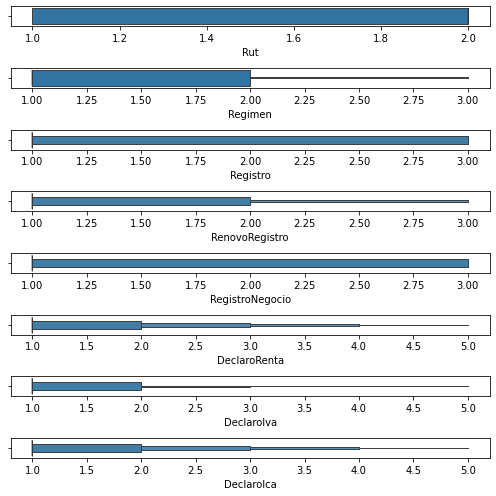

In [9]:
fig, axs = plt.subplots(8, figsize=(7,7))
# indicar la posicion de la columna a evaluar ax=axs[1]
plt1 = sns.boxenplot(microD['Rut'], ax=axs[0])
plt2 = sns.boxenplot(microD['Regimen'], ax=axs[1])
plt3 = sns.boxenplot(microD['Registro'], ax=axs[2])
plt4 = sns.boxenplot(microD['RenovoRegistro'], ax=axs[3])
plt5 = sns.boxenplot(microD['RegistroNegocio'], ax=axs[4])
plt6 = sns.boxenplot(microD['DeclaroRenta'], ax=axs[5])
plt7 = sns.boxenplot(microD['DeclaroIva'], ax=axs[6])
plt8 = sns.boxenplot(microD['DeclaroIca'], ax=axs[7])
plt.tight_layout()

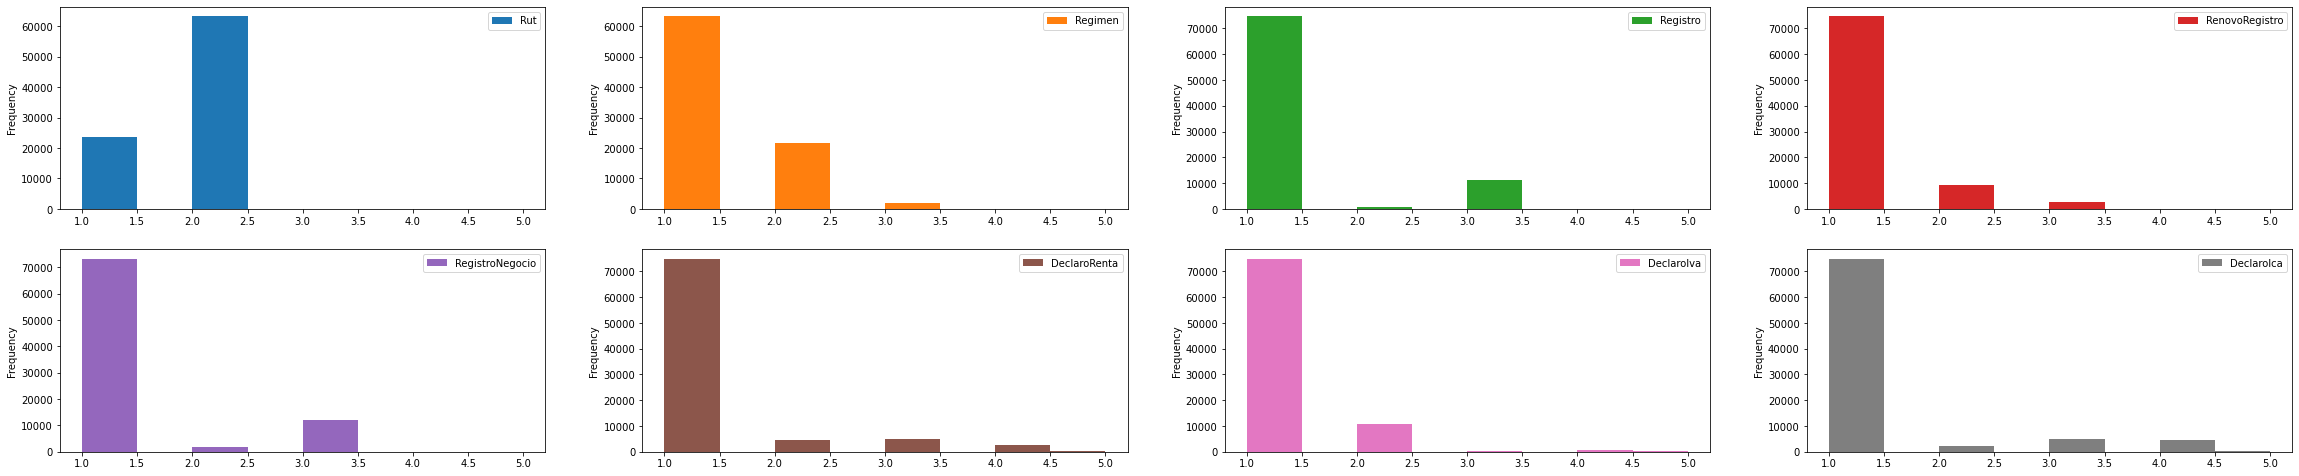

In [10]:
##encontramos una tendencia hacia el lado izquierdo, hacia la opcion 1, de las variables:
##RenovoRegistro
##DeclaroRenta
##DeclaroIva
##DeclaroIca

#Evaluaremos individualmente las columnas
plt.rcParams['figure.figsize']=(40,35)
microD.plot(kind='hist', bins=8, subplots=True, layout=(8,4), sharex=False, sharey=False)
plt.show()

<div class="alert alert-block alert-success"><b>PASO 7: Seleccionando datos para variables de testeo y de entrenamiento</b><br></div>

In [11]:
#utilizaremos el algoritmo knn primero variables train y test
#nuestra variable objetivo sera regimen si es subsidiado o comun
X= microD.drop(['Registro'], axis=1)
y= microD['Registro']
from sklearn.model_selection import train_test_split
#una tasa de 20% para datos de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape

((69575, 7), (17394, 7))

<div class="alert alert-block alert-success"><b>PASO 8: Estandarizacion de datos</b><br></div>

In [12]:
#almacenando indices de columnas
columnas = X.columns
##libreria necesaria
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
##aplicando estandarizacion
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
##reasignando con el dataset
X_train = pd.DataFrame(X_train, columns=[columnas])
X_test = pd.DataFrame(X_test, columns=[columnas])
##observando las cabeceras
X_train.head()

,Rut,Regimen,RenovoRegistro,RegistroNegocio,DeclaroRenta,DeclaroIva,DeclaroIca
0,0.611108,-0.584520,-0.378855,-0.428173,-0.3665,-0.345905,-0.377998
1,0.611108,-0.584520,-0.378855,-0.428173,-0.3665,-0.345905,-0.377998
2,0.611108,-0.584520,-0.378855,-0.428173,-0.3665,-0.345905,-0.377998
3,-1.636372,1.391475,1.810599,2.427479,-0.3665,-0.345905,-0.377998
4,0.611108,-0.584520,-0.378855,-0.428173,-0.3665,-0.345905,-0.377998


In [17]:
##hacemos el importe del KNN
from sklearn.neighbors import KNeighborsClassifier
##lo dejamos con 5 vecinos o datos cecanos
knn = KNeighborsClassifier(n_neighbors=5)
#entrenamos el modelo
knn.fit(X_train, y_train)
#entrenamos la variable de prediccion
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 3, 1])

In [18]:
#ahora comprobamos la exactitud del modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9898240772680235

<AxesSubplot:>

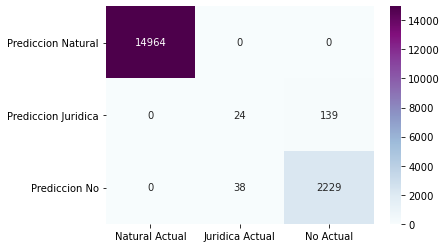

In [20]:
#una matriz para evaluar el resultado
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
#y la graficamos
plt.figure(figsize=(6,4))
matriz = pd.DataFrame(data=matriz, columns=['Natural Actual', 'Juridica Actual','No Actual'],
                      index=['Prediccion Natural', 'Prediccion Juridica', 'Prediccion No'])
sns.heatmap(matriz, annot=True, fmt='d', cmap='BuPu')

In [39]:
##Y generamos un reporte de datos predichos vs datos ctuales
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     14964
           2       0.36      0.15      0.22       163
           3       0.94      0.98      0.96      2267

    accuracy                           0.99     17394
   macro avg       0.77      0.71      0.73     17394
weighted avg       0.99      0.99      0.99     17394



In [28]:
## y observams que obtuvimos una buena eficiencia en el modelo de prediccio de datos